<br><br><br>
<center>
<b><font size="+3">CS584: FIFA18 data Analysis </font></b>
<br><br><br><br>
*Ting Jiang*<br>
*Chen Gong*<br>
*Yizhi Hong*
</center>
<br><br><br>

**** <h3>Part 1: Data pre-processing</h3> ****


In [1]:
import numpy as np
import sys
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix, hstack, vstack
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
sns.set_style("dark")

/Users/Chi.Hong/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**** <h4>look up data firt 10 columns</h4> ****

In [3]:
dataframe = pd.read_csv('../data/fifa-18-demo-player-dataset/CompleteDataset.csv')
dataframe.head(10)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [4]:
dataframe.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

**** take the attribute that we need to use ****
<p>The attribute needs to be predicted: 'Overall','Preferred Positions'</p>
<p>The attribute use to predict: rest of the attributes</p>
       

In [5]:
# only consider non goalkeeper's position.

col_needed = ['Overall','Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions']

# rearrange the attributes. The attribute need to be predicted: Overall, Preferred Position
# rearrange as ST -> CM -> CB

recol_needed = ['Overall','Finishing', 'Shot power', 'Positioning', 'Dribbling', 'Long shots','Penalties', 'Volleys', 
                 'Acceleration', 'Agility','Sprint speed', 'Curve',
                
       'Free kick accuracy', 'Heading accuracy', 
       'Short passing', 'Long passing', 'Vision',
       'Strength', 'Stamina', 'Balance', 'Ball control','Composure','Jumping', 
       'Crossing','Reactions',
       'Aggression','Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle','Preferred Positions']

dataframe = dataframe[recol_needed]
dataframe.head(10)

,Overall,Finishing,Shot power,Positioning,Dribbling,Long shots,Penalties,Volleys,Acceleration,Agility,...,Composure,Jumping,Crossing,Reactions,Aggression,Interceptions,Marking,Sliding tackle,Standing tackle,Preferred Positions
0,94,94,94,95,91,92,85,88,89,89,...,95,95,85,96,63,29,22,23,31,ST LW
1,93,95,85,93,97,88,74,85,92,90,...,96,68,77,95,48,22,13,26,28,RW
2,92,89,80,90,96,77,81,83,94,96,...,92,61,75,88,56,36,21,33,24,LW
3,92,94,87,92,86,86,85,88,88,86,...,83,69,77,93,78,41,30,38,45,ST
4,92,13,25,12,30,16,47,11,58,52,...,70,78,15,85,29,30,10,11,10,GK
5,91,91,88,91,85,83,81,87,79,78,...,87,84,62,91,80,39,25,19,42,ST
6,90,13,31,12,18,12,40,13,57,60,...,64,67,17,88,38,30,13,13,21,GK
7,90,83,79,85,93,82,86,79,93,93,...,87,59,80,85,54,41,25,22,27,LW
8,90,76,87,79,79,90,73,82,60,71,...,85,32,85,86,60,85,63,69,82,CDM CM
9,90,91,88,92,84,82,70,88,78,75,...,86,79,68,88,50,20,12,18,22,ST


In [6]:
dataframe['Preferred Positions'] = dataframe['Preferred Positions'].str.strip()
#remove Goalkeeper from dataframe

dataframe = dataframe[dataframe['Preferred Positions'] != 'GK']
dataframe.head(10)


,Overall,Finishing,Shot power,Positioning,Dribbling,Long shots,Penalties,Volleys,Acceleration,Agility,...,Composure,Jumping,Crossing,Reactions,Aggression,Interceptions,Marking,Sliding tackle,Standing tackle,Preferred Positions
0,94,94,94,95,91,92,85,88,89,89,...,95,95,85,96,63,29,22,23,31,ST LW
1,93,95,85,93,97,88,74,85,92,90,...,96,68,77,95,48,22,13,26,28,RW
2,92,89,80,90,96,77,81,83,94,96,...,92,61,75,88,56,36,21,33,24,LW
3,92,94,87,92,86,86,85,88,88,86,...,83,69,77,93,78,41,30,38,45,ST
5,91,91,88,91,85,83,81,87,79,78,...,87,84,62,91,80,39,25,19,42,ST
7,90,83,79,85,93,82,86,79,93,93,...,87,59,80,85,54,41,25,22,27,LW
8,90,76,87,79,79,90,73,82,60,71,...,85,32,85,86,60,85,63,69,82,CDM CM
9,90,91,88,92,84,82,70,88,78,75,...,86,79,68,88,50,20,12,18,22,ST
10,90,60,79,52,61,55,68,66,75,79,...,80,93,66,85,84,88,86,91,89,CB
11,89,83,85,84,85,86,77,82,76,80,...,84,65,90,88,68,56,30,40,51,RM CM CAM


**** Check the data  ****

In [7]:
# make sure no null value.
dataframe.isnull().values.any()

False

In [8]:
# Check all the positions we have.
positions = dataframe['Preferred Positions'].str.split().apply(lambda x: x[0]).unique()
positions

array(['ST', 'RW', 'LW', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM', 'RB',
       'CF', 'RWB', 'LWB'], dtype=object)

In [9]:
# handle multiple positions
df_fifa = dataframe.copy()
df_fifa.drop(df_fifa.index, inplace=True)

for position in positions:
    temp = dataframe[dataframe['Preferred Positions'].str.contains(position)]
    temp['Preferred Positions'] = position
    df_fifa = df_fifa.append(temp, ignore_index=True)
    
df_fifa.iloc[::1000, :]

,Overall,Finishing,Shot power,Positioning,Dribbling,Long shots,Penalties,Volleys,Acceleration,Agility,...,Composure,Jumping,Crossing,Reactions,Aggression,Interceptions,Marking,Sliding tackle,Standing tackle,Preferred Positions
0,94,94,94,95,91,92,85,88,89,89,...,95,95,85,96,63,29,22,23,31,ST
1000,70,68,66,75,67,63,67,63,63,68,...,67,72,62,68,70,56,21,25,31,ST
2000,64,53,50,61,67,42,51,48,86,81,...,44,60,59,58,32,17,23,26,24,ST
3000,56,61,53,49,48,49,53,47,56,58,...,49,78,31,53,42,28,22,19,24,ST
4000,62,57,59,60,61,52,57,45,79,70,...,49,54,59,65,41,26,22,20,19,RW
5000,61,46,70,72,60,54,63,67,76,74,...,58,51,47,58,34,13,17,17,17,LW
6000,71,57-3,73-5,63-3,67-1,68-4,69,49,45,68,...,77,73,61-3,72,68,69-4,68,66-3,69-2,CDM
7000,65,60,55,66,63,55,65,51,66,61,...,57,66,66,60,61,55,45,58,64,CDM
8000,78,65,77,59,64,64,50,56,58,52,...,67,74,53,72,77,78,75,76,81,CB
9000,70,22,62,44,58,44,62,21,51,39,...,61,57,57,68,73,72,72,65,70,CB


In [10]:
cols = [col for col in df_fifa.columns if col not in ['Preferred Positions']]

for i in cols:
    df_fifa[i] = df_fifa[i].apply(lambda x: eval(x) if isinstance(x,str) else x)

df_fifa.iloc[::1000, :]

,Overall,Finishing,Shot power,Positioning,Dribbling,Long shots,Penalties,Volleys,Acceleration,Agility,...,Composure,Jumping,Crossing,Reactions,Aggression,Interceptions,Marking,Sliding tackle,Standing tackle,Preferred Positions
0,94,94,94,95,91,92,85,88,89,89,...,95,95,85,96,63,29,22,23,31,ST
1000,70,68,66,75,67,63,67,63,63,68,...,67,72,62,68,70,56,21,25,31,ST
2000,64,53,50,61,67,42,51,48,86,81,...,44,60,59,58,32,17,23,26,24,ST
3000,56,61,53,49,48,49,53,47,56,58,...,49,78,31,53,42,28,22,19,24,ST
4000,62,57,59,60,61,52,57,45,79,70,...,49,54,59,65,41,26,22,20,19,RW
5000,61,46,70,72,60,54,63,67,76,74,...,58,51,47,58,34,13,17,17,17,LW
6000,71,54,68,60,66,64,69,49,45,68,...,77,73,58,72,68,65,68,63,67,CDM
7000,65,60,55,66,63,55,65,51,66,61,...,57,66,66,60,61,55,45,58,64,CDM
8000,78,65,77,59,64,64,50,56,58,52,...,67,74,53,72,77,78,75,76,81,CB
9000,70,22,62,44,58,44,62,21,51,39,...,61,57,57,68,73,72,72,65,70,CB


**** <h3>Part 2: Data Analyze </h3> ****
**** <h4>The plot below shows how the attributes contribute the position. </h4> ****

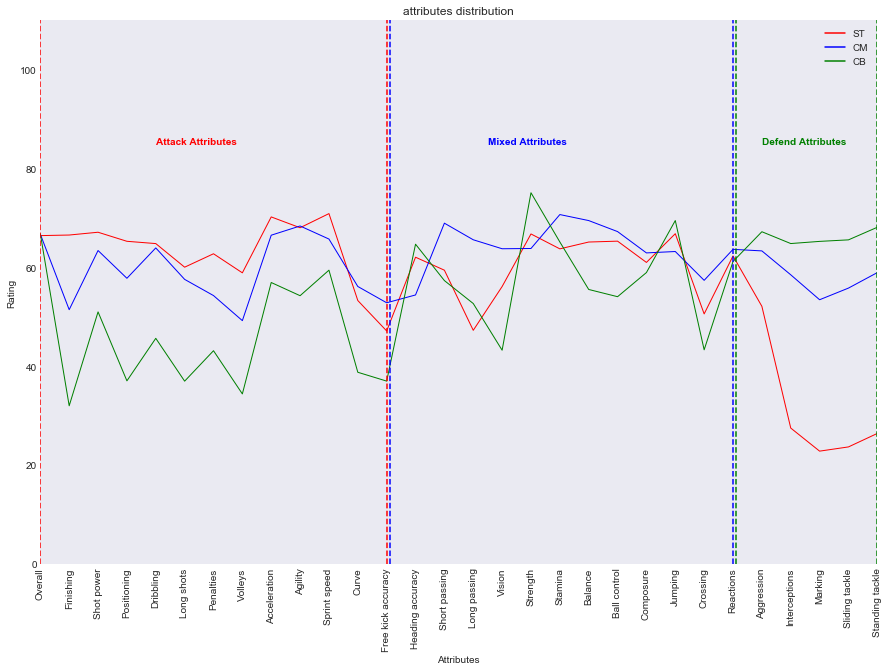

In [11]:
fig, fs = plt.subplots()

## show the 3 main positions  
df_ST = df_fifa[df_fifa['Preferred Positions'] == 'ST'].iloc[::10,:-1]
np.mean(df_ST).T.plot.line(color = 'red', figsize = (15,10), legend = 'ST',label='ST', ylim = (0, 110), title = "attributes distribution", ax=fs)

df_CM = df_fifa[df_fifa['Preferred Positions'] == 'CM'].iloc[::10,:-1]
np.mean(df_CM).T.plot.line(color = 'blue', figsize = (15,10), legend = 'CM',label='CM', ylim = (0, 110), title = "attributes distribution", ax=fs)

df_CB = df_fifa[df_fifa['Preferred Positions'] == 'CB'].iloc[::10,:-1]
np.mean(df_CB).T.plot.line(color = 'green', figsize = (15,10), legend = 'CB',label='CB', ylim = (0, 110), title = "attributes distribution", ax=fs)



fs.set_xlabel('Attributes')
fs.set_ylabel('Rating')

fs.set_xticks(np.arange(len(cols)))
fs.set_xticklabels(labels = cols, rotation=90)

for l in fs.lines:
    l.set_linewidth(1)

fs.axvline(0, color='red', linestyle='--')   
fs.axvline(12, color='red', linestyle='--')

fs.axvline(12.1, color='blue', linestyle='--')
fs.axvline(24, color='blue', linestyle='--')

fs.axvline(24.1, color='green', linestyle='--')
fs.axvline(29, color='green', linestyle='--')

fs.text(4, 85, 'Attack Attributes', color = 'red', weight = 'bold')
fs.text(15.5, 85, 'Mixed Attributes', color = 'blue', weight = 'bold')
fs.text(25, 85, 'Defend Attributes', color = 'green', weight = 'bold')
plt.show()

**** we can see above there is obvious margin between attacker's attributes and defender's attributes  ****

*** <h3>1. Logistic Regression </h3> ***

*****  predict the Attacker or the Defender  *****

**** Set the ST/RW/LW/RM/CM/LM/CAM/CF as an Attacker group --> 1 ****

**** Set the CDM/CB/LB/RB/RWB/LWB as an Defender group --> 0 ****

In [12]:
# Set the baseline of the prediction
baseline = 1/2
print('The baseline is', baseline)

The baseline is 0.5


In [13]:
df_fifa_normalized = df_fifa.iloc[:,:-1].div(df_fifa.iloc[:,:-1].sum(axis=1), axis=0)
mapping = {'ST': 1, 'RW': 1, 'LW': 1, 'RM': 1, 'CM': 1, 'LM': 1, 'CAM': 1, 'CF': 1, 'CDM': 0, 'CB': 0, 'LB': 0, 'RB': 0, 'RWB': 0, 'LWB': 0}

df_fifa_normalized['Preferred Positions'] = df_fifa['Preferred Positions']

df_fifa_normalized = df_fifa_normalized.replace({'Preferred Positions': mapping})
df_fifa_normalized.iloc[::1000,]

,Overall,Finishing,Shot power,Positioning,Dribbling,Long shots,Penalties,Volleys,Acceleration,Agility,...,Composure,Jumping,Crossing,Reactions,Aggression,Interceptions,Marking,Sliding tackle,Standing tackle,Preferred Positions
0,0.039847,0.039847,0.039847,0.040271,0.038576,0.039000,0.036032,0.037304,0.037728,0.037728,...,0.040271,0.040271,0.036032,0.040695,0.026706,0.012293,0.009326,0.009750,0.013141,1
1000,0.037797,0.036717,0.035637,0.040497,0.036177,0.034017,0.036177,0.034017,0.034017,0.036717,...,0.036177,0.038877,0.033477,0.036717,0.037797,0.030238,0.011339,0.013499,0.016739,1
2000,0.040842,0.033823,0.031908,0.038928,0.042757,0.026803,0.032546,0.030632,0.054882,0.051691,...,0.028079,0.038290,0.037652,0.037013,0.020421,0.010849,0.014678,0.016592,0.015316,1
3000,0.039773,0.043324,0.037642,0.034801,0.034091,0.034801,0.037642,0.033381,0.039773,0.041193,...,0.034801,0.055398,0.022017,0.037642,0.029830,0.019886,0.015625,0.013494,0.017045,1
4000,0.039241,0.036076,0.037342,0.037975,0.038608,0.032911,0.036076,0.028481,0.050000,0.044304,...,0.031013,0.034177,0.037342,0.041139,0.025949,0.016456,0.013924,0.012658,0.012025,1
5000,0.038293,0.028876,0.043942,0.045198,0.037665,0.033898,0.039548,0.042059,0.047709,0.046453,...,0.036409,0.032015,0.029504,0.036409,0.021343,0.008161,0.010672,0.010672,0.010672,1
6000,0.036960,0.028110,0.035398,0.031234,0.034357,0.033316,0.035919,0.025508,0.023425,0.035398,...,0.040083,0.038001,0.030193,0.037480,0.035398,0.033837,0.035398,0.032795,0.034878,0
7000,0.036171,0.033389,0.030607,0.036728,0.035058,0.030607,0.036171,0.028381,0.036728,0.033945,...,0.031720,0.036728,0.036728,0.033389,0.033945,0.030607,0.025042,0.032276,0.035615,0
8000,0.038825,0.032354,0.038328,0.029368,0.031857,0.031857,0.024888,0.027875,0.028870,0.025884,...,0.033350,0.036834,0.026381,0.035839,0.038328,0.038825,0.037332,0.037830,0.040319,0
9000,0.042735,0.013431,0.037851,0.026862,0.035409,0.026862,0.037851,0.012821,0.031136,0.023810,...,0.037241,0.034799,0.034799,0.041514,0.044567,0.043956,0.043956,0.039683,0.042735,0


In [14]:
# perform 5 cross validation
clf = LogisticRegression()
x = df_fifa_normalized.iloc[:,:-1]
y = df_fifa_normalized.iloc[:,-1]
scores = cross_val_score(clf, x, y, cv=5)
print ('Logistic Regression Accuracy: {}'.format(np.mean(scores)))

Logistic Regression Accuracy: 0.8247060870911659


**** Tune the features by lasso ****

In [15]:
#Perform lasso to get rid of the attribute that unnecessary influence the decision of position
clf = Lasso(alpha=0.00001)
clf.fit(x,y)
Feature_Coef_list = list(sorted(zip(recol_needed, abs(clf.coef_)),key=lambda x: -x[1]))
Feature_Coef_table = pd.DataFrame(np.array(Feature_Coef_list).reshape(-1,2), columns = ['Attributes', 'Coefficient'])
print(Feature_Coef_table)

            Attributes     Coefficient
0              Marking     11.13209727
1            Finishing    9.8962076159
2               Vision    6.8567879403
3              Overall   6.34613490803
4        Interceptions   4.77723878996
5             Crossing   4.69090655742
6       Sliding tackle    4.6484871289
7        Short passing   4.36900008552
8     Heading accuracy   4.13270382179
9          Positioning   3.92430870186
10             Volleys   2.32842916586
11        Long passing   2.26317284857
12             Balance   2.01616090561
13             Jumping   1.73687147151
14  Free kick accuracy   1.65818299991
15           Reactions   1.40307357195
16        Ball control  0.808624901334
17             Agility  0.748758074388
18            Strength  0.523559227578
19           Dribbling  0.507372774338
20               Curve  0.506313190176
21        Acceleration  0.464846463463
22             Stamina  0.172440802888
23           Penalties  0.132479441118
24          Shot power   

**** now we try to enumerate the features to get the highest performance ****

In [16]:
max_score = 0
n_features = 0

for i in range(1,len(Feature_Coef_table['Attributes'])):
    clf_lasso = LogisticRegression()
    lasso_cols = Feature_Coef_table[:i]['Attributes'].tolist()
    x_lasso = df_fifa_normalized.iloc[:,:-1][lasso_cols]
    scores_lasso = cross_val_score(clf_lasso, x_lasso,y , cv=5)
    if np.mean(scores_lasso) > max_score:
        max_score = np.mean(scores_lasso)
        n_features = i

print ('Logistic Regression Accuracy (' + str(n_features) +' features):' + str(max_score))

Logistic Regression Accuracy (7 features):0.833513325558


**** As we can see here. we are improve the accuracy slightly ****

**** And it is higher than baseline 0.5 ****

In [17]:
imp_features = Feature_Coef_table[:n_features]['Attributes'].tolist()
print('The important features to determine the 1/0 is')
print(imp_features)

The important features to determine the 1/0 is
['Marking', 'Finishing', 'Vision', 'Overall', 'Interceptions', 'Crossing', 'Sliding tackle']


*** <h3>2. Random Forest</h3>  ***

*****  predict all the position *****

In [18]:
# Set the baseline of the prediction
baseline = 1/len(positions)
print('The baseline is', baseline)

The baseline is 0.07142857142857142


In [19]:
df_fifa_all_pos = df_fifa.copy()
mapping_all = {'ST': 0, 'RW': 1, 'LW': 2, 'RM': 3, 'CM': 4, 'LM': 5, 'CAM': 6, 'CF': 7, 'CDM': 8, 'CB': 9, 'LB': 10, 'RB': 11, 'RWB': 12, 'LWB': 13}

df_fifa_all_pos = df_fifa_all_pos.replace({'Preferred Positions': mapping_all})
df_fifa_all_pos.iloc[::1000,]

,Overall,Finishing,Shot power,Positioning,Dribbling,Long shots,Penalties,Volleys,Acceleration,Agility,...,Composure,Jumping,Crossing,Reactions,Aggression,Interceptions,Marking,Sliding tackle,Standing tackle,Preferred Positions
0,94,94,94,95,91,92,85,88,89,89,...,95,95,85,96,63,29,22,23,31,0
1000,70,68,66,75,67,63,67,63,63,68,...,67,72,62,68,70,56,21,25,31,0
2000,64,53,50,61,67,42,51,48,86,81,...,44,60,59,58,32,17,23,26,24,0
3000,56,61,53,49,48,49,53,47,56,58,...,49,78,31,53,42,28,22,19,24,0
4000,62,57,59,60,61,52,57,45,79,70,...,49,54,59,65,41,26,22,20,19,1
5000,61,46,70,72,60,54,63,67,76,74,...,58,51,47,58,34,13,17,17,17,2
6000,71,54,68,60,66,64,69,49,45,68,...,77,73,58,72,68,65,68,63,67,8
7000,65,60,55,66,63,55,65,51,66,61,...,57,66,66,60,61,55,45,58,64,8
8000,78,65,77,59,64,64,50,56,58,52,...,67,74,53,72,77,78,75,76,81,9
9000,70,22,62,44,58,44,62,21,51,39,...,61,57,57,68,73,72,72,65,70,9


In [20]:
# perform 5 cross validation
clf = LogisticRegression()
x = df_fifa_all_pos.iloc[:,:-1]
y = df_fifa_all_pos.iloc[:,-1]
log_scores = cross_val_score(clf, x, y, cv=3)
print ('Logistic Regression Accuracy: {}'.format(np.mean(log_scores)))

Logistic Regression Accuracy: 0.45080732796136597


In [21]:
clf = RandomForestClassifier(random_state=0)
x = df_fifa_all_pos.iloc[:,:-1]
y = df_fifa_all_pos.iloc[:,-1]
rf_scores = cross_val_score(clf, x, y, cv=3)
print ('Random Forest Accuracy: {}'.format(np.mean(rf_scores)))

Random Forest Accuracy: 0.32505937892358683


**** Tune the features by ridge ****

In [22]:
# Perform ridge to get the importance of the feature when determining the position.
clf = Ridge(alpha=0.001)
clf.fit(x,y)
Feature_Coef_list = list(sorted(zip(recol_needed, abs(clf.coef_)),key=lambda x: -x[1]))
Feature_Coef_table = pd.DataFrame(np.array(Feature_Coef_list).reshape(-1,2), columns = ['Attributes', 'Coefficient'])
print(Feature_Coef_table)

            Attributes        Coefficient
0              Overall    0.0717080168083
1            Finishing    0.0522304336032
2             Crossing    0.0433288377307
3              Marking    0.0314207616489
4         Ball control    0.0304023274928
5       Sliding tackle    0.0256481212323
6        Short passing    0.0219442536492
7          Positioning    0.0209245070663
8        Interceptions    0.0163144373453
9               Vision    0.0162954778204
10           Penalties    0.0136074977623
11     Standing tackle    0.0131716395467
12          Shot power    0.0112859824342
13               Curve   0.00912983517573
14        Long passing   0.00851227891875
15    Heading accuracy   0.00806576156269
16             Volleys   0.00764793997365
17  Free kick accuracy    0.0076164430895
18          Aggression   0.00754916691825
19           Composure    0.0073492387795
20          Long shots    0.0063430751331
21            Strength   0.00427936412214
22             Stamina   0.0033900

**** now we try to enumerate the features to get the highest performance ****

In [23]:
max_score = 0
n_features = 0

for i in range(1,len(Feature_Coef_table['Attributes'])):
    clf_ridge = RandomForestClassifier(random_state=0)
    ridge_cols = Feature_Coef_table[:i]['Attributes'].tolist()
    x_ridge = df_fifa_normalized.iloc[:,:-1][ridge_cols]
    scores_ridge = cross_val_score(clf_ridge, x_ridge,y , cv=3)
    if np.mean(scores_ridge) > max_score:
        max_score = np.mean(scores_ridge)
        n_features = i

print ('Random Forest Accuracy (' + str(n_features) +' features):' + str(max_score)) 

Random Forest Accuracy (22 features):0.395765861155


In [24]:
imp_features = Feature_Coef_table[:n_features]['Attributes'].tolist()
print('The important features to determine the positon is')
print(imp_features)

The important features to determine the positon is
['Overall', 'Finishing', 'Crossing', 'Marking', 'Ball control', 'Sliding tackle', 'Short passing', 'Positioning', 'Interceptions', 'Vision', 'Penalties', 'Standing tackle', 'Shot power', 'Curve', 'Long passing', 'Heading accuracy', 'Volleys', 'Free kick accuracy', 'Aggression', 'Composure', 'Long shots', 'Strength']


**** As we can see here. we are improve the accuracy slightly ****

**** And 0.395765861155 is higher than baseline 0.07142857142857142 ****

*** <h3>3. Linear Regression</h3> ***
***** predict the overall of the player. *****

**** define a new cross validation ****

In [25]:
def cross_Validation_reg(reg, X, y, k = 3):
    
    tMSE = list()

    for train_index, test_index in KFold(n_splits=k, random_state=None, shuffle=False).split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regm = reg.fit(X_train, y_train)
        tMSE.append(np.mean((y_test - regm.predict(X_test)) ** 2))
    return np.mean(tMSE)

In [26]:
## set y overall
overall = np.array(df_fifa.iloc[:,0:1])[:,0]
Xb = csr_matrix(df_fifa.iloc[:, 1:-1])
Xb.toarray()

array([[94, 94, 95, ..., 22, 23, 31],
       [94, 87, 92, ..., 30, 38, 45],
       [91, 88, 91, ..., 25, 19, 42],
       ..., 
       [35, 27, 51, ..., 55, 57, 55],
       [38, 53, 39, ..., 29, 36, 30],
       [34, 44, 44, ..., 49, 43, 48]], dtype=int64)

In [27]:
class baseline:
    
    def fit(self, X, y):
        return self
    
    def predict(self, X):
        n = X.shape[0]
        res = np.zeros(n)
        for i in range(n):
            res[i] = np.mean(X[i,:])
        return res

# set the baseline class for certain player
bl = baseline()

In [28]:
# test baseline for all
cross_Validation_reg(bl, Xb, overall, 5)

84.765765665367482

**** Perform linear model ****

In [29]:
overall = np.array(df_fifa.iloc[:,0:1])[:,0]
X = csr_matrix(df_fifa_all_pos.iloc[:, :])
lr = LinearRegression()

## ignore the positions
accuracy = cross_Validation_reg(lr, Xb,overall, 5)
print('The linear model Accuracy(ignore the positions):' + str(accuracy))

lr = LinearRegression()
## fatorize the positions
accuracy_f = cross_Validation_reg(lr, X, overall, 5)
print('The linear model Accuracy(fatorize the positions):' + str(accuracy_f))


The linear model Accuracy(ignore the positions):24.1899472391
The linear model Accuracy(fatorize the positions):21.6724222569


In [30]:
lrm = lr.fit(X, overall)
print('The coef are ' + str(lrm.coef_))
print('The intercept is ' + str(lrm.intercept_))

The coef are [ 0.50296368 -0.0088104  -0.00452567  0.01011129  0.01096997  0.05972182
 -0.08519162  0.02961537 -0.05606899 -0.04137218 -0.04830314  0.03610987
 -0.01101434 -0.05770672 -0.07897779  0.01758256 -0.05891234 -0.24378331
  0.02476237 -0.27168061  0.02807166  0.07749302 -0.00907431  0.07296686
  0.10880582  0.03459514  0.06388949  0.00142567 -0.04639001 -0.01173554
 -0.25987998]
The intercept is 66.9109023522


**** Perform polynomial model ****

In [31]:
model = make_pipeline(PolynomialFeatures(2), Ridge(copy_X = False))
accuracy_p = cross_Validation_reg(model, X.toarray(), overall, 5)
print('The polyomial model accuracy (factorize the positions):' + str(accuracy))

The polyomial model accuracy (factorize the positions):24.1899472391


In [32]:
nX = X.toarray()
modelp = model.fit(nX , overall)
result = modelp.predict(nX)
print('To predict all the player overall rating by our model')
print(result)

To predict all the player overall rating by our model
[ 94.00029641  92.00053072  91.00084033 ...,  53.00020395  51.00029448
  47.00097197]


**** we get a very good accuracy in polynomial model  ****